# Seasonal Temperature Analysis

***
This notebook depicts the changes concerning the increase of temperature per season across the U.S.A from 1896 to 2021.
***

#### 1) Importing Required Packages

In [1]:
## Required packages
import pandas as pd # To import and manipulate datasets
import matplotlib.pyplot as plt # To make changes in figures 
import plotly.express as px # To plot maps and boxplot
import plotly.graph_objects as go # Another way To plot maps with color scale
import numpy as np # To fix colors in pie chart
from functools import reduce # To merge multiple datasets

#### 2) Importing Seasonal Temperature datasets

In [2]:
av_seas_temp= pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Seasonal_Temperature\av_seas_temp.csv')
changes_anual_temp= pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Seasonal_Temperature\changes_anual_temp.csv')
df_changes_seas_temp= pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Seasonal_Temperature\df_changes_seas_temp.csv')

#### 3) Descriptive Statistics

****
 <i> <b>Seasonal Average Temperature Dataset: </b></i> Shows the average Temperature changes (°F) in the U.S.A. for all different Seasons, and they are defined as follows: Winter (December, January, February), spring (March, April, May), summer (June, July, August), and fall (September, October, November).
****

In [3]:
av_seas_temp.head(2)

Year  Winter  Spring  Summer  Fall
0  1896    0.51    0.02    0.55 -2.49
1  1897    0.14   -0.55   -0.46  0.59

Average Seasonal Temperature Changes

In [4]:
round(av_seas_temp.iloc[:,1:5].describe(),2)

Winter  Spring  Summer    Fall
count  125.00  125.00  125.00  125.00
mean     0.24    0.22    0.22    0.21
std      2.01    1.40    1.01    1.19
min     -5.62   -3.55   -2.32   -2.66
25%     -1.07   -0.58   -0.44   -0.59
50%      0.29   -0.05    0.31    0.18
75%      1.33    1.12    0.77    0.86
max      4.55    5.26    2.60    4.05

Variation in the average temperature (°F) per season form 1896 to 2021 in the U.S.A.

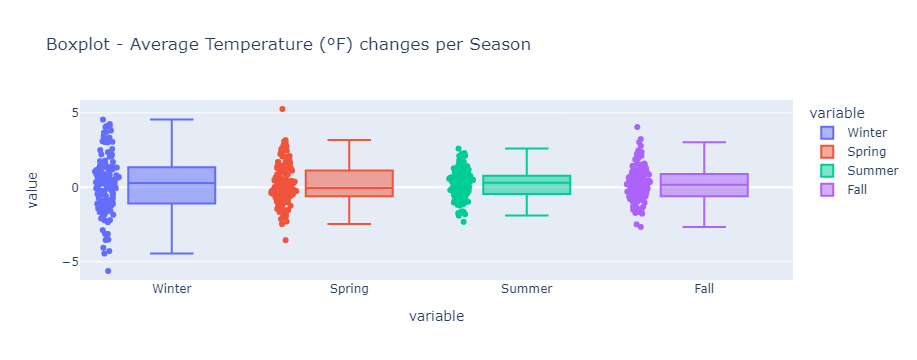

In [5]:
fig = px.box(av_seas_temp.iloc[:,1:5], color="variable", points="all",
            title="Boxplot - Average Temperature (°F) changes per Season")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

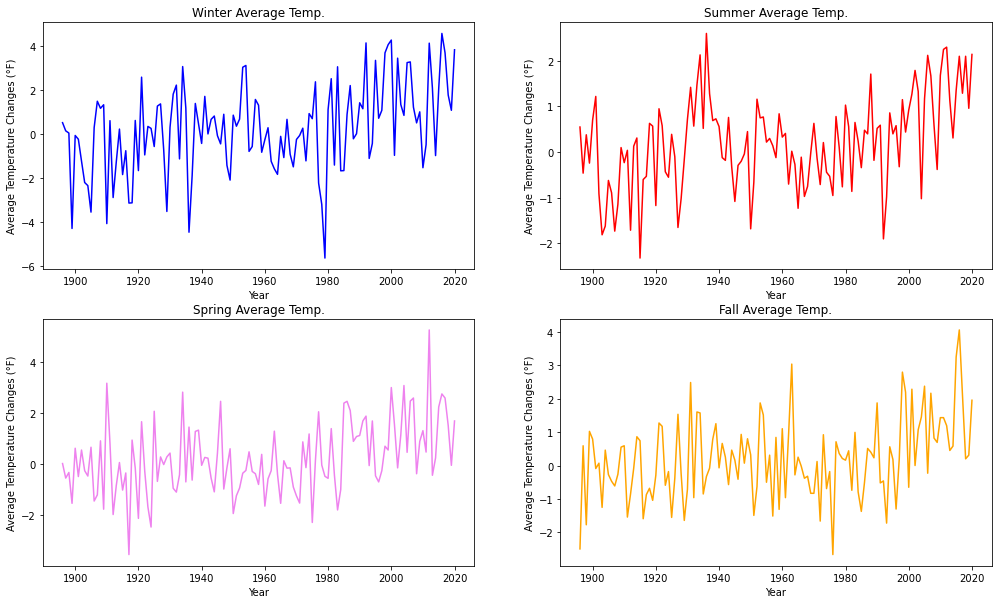

In [6]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2,figsize = (17, 10) )
  

axis[0, 0].plot( av_seas_temp["Year"], av_seas_temp["Winter"], color = "Blue", label = "ssd")
axis[0, 0].set_title("Winter Average Temp.")
axis[0, 0].set_xlabel("Year")
axis[0, 0].set_ylabel("Average Temperature Changes (°F)")
  
axis[0, 1].plot( av_seas_temp["Year"], av_seas_temp["Summer"], color = "Red")
axis[0, 1].set_title("Summer Average Temp.")
axis[0, 1].set_xlabel("Year")
axis[0, 1].set_ylabel("Average Temperature Changes (°F)")
  
axis[1, 0].plot( av_seas_temp["Year"], av_seas_temp["Spring"], color = "violet")
axis[1, 0].set_title("Spring Average Temp.")
axis[1, 0].set_xlabel("Year")
axis[1, 0].set_ylabel("Average Temperature Changes (°F)")

axis[1, 1].plot( av_seas_temp["Year"], av_seas_temp["Fall"], color = "Orange")
axis[1, 1].set_title("Fall Average Temp.")
axis[1, 1].set_xlabel("Year")
axis[1, 1].set_ylabel("Average Temperature Changes (°F)")  
# Combine all the operations and display

plt.show()

The plots show that in most cases nearly by 2020 the average temperature increased around 2 °F compared to the other years. However, we will identify the years that presented the maximum temperature changes as shown below.

In [7]:
max_c= av_seas_temp.iloc[:,1:5].max()

In [8]:
Y_W = av_seas_temp.index[av_seas_temp['Winter'] == max_c[0]].tolist()
Y_SP = av_seas_temp.index[av_seas_temp['Spring'] == max_c[1]].tolist()
Y_SM = av_seas_temp.index[av_seas_temp['Summer'] == max_c[2]].tolist()
Y_F = av_seas_temp.index[av_seas_temp['Fall'] == max_c[3]].tolist()

YW_df=av_seas_temp.iloc[Y_W,[0,1]]
YSP_df=av_seas_temp.iloc[Y_SP,[0,2]]
YSM_df=av_seas_temp.iloc[Y_SM,[0,3]]
YF_df=av_seas_temp.iloc[Y_F,[0,4]]

In [9]:
max_changes = [YW_df, YSP_df, YSM_df, YF_df]
max_changes = reduce(lambda  left,right: pd.merge(left,right,on=['Year'],how='outer'), max_changes).fillna('-')

max_changes.sort_values(by='Year')

Year Winter Spring Summer  Fall
2  1936      -      -    2.6     -
1  2012      -   5.26      -     -
0  2016   4.55      -      -  4.05

****
 <i> <b>Changes in the Anual Temperature Dataset: </b></i> These data show the average increase in temperature (°F) from 1986-2021 per season in the U.S.A.
****

In [10]:
changes_anual_temp.head(2)

Season  Total change
0  Winter      2.806377
1  Spring      1.899581

In [11]:
changes_anual_temp.describe()

Total change
count      4.000000
mean       1.873042
std        0.666621
min        1.375048
25%        1.402133
50%        1.655371
75%        2.126280
max        2.806377

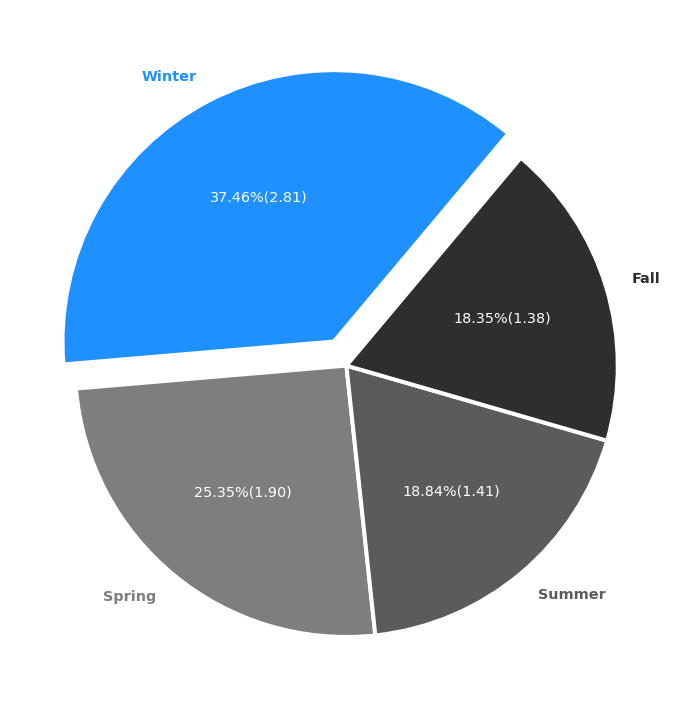

In [12]:
#import numpy as np

fig, ax = plt.subplots(figsize=(15, 10))

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(changes_anual_temp["Season"]))))
# Differenc color for gratest Temperature change.
colors[0] = 'dodgerblue'


patches, texts, pcts = ax.pie(
    changes_anual_temp["Total change"], labels=changes_anual_temp["Season"], 
    autopct=lambda p:'{:.2f}%({:.2f})'.format(p,(p/100)*changes_anual_temp["Total change"].sum()),
    wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=50,
    colors= colors,
    # "Exploding" the Winter variable to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patches):
   
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Average Anual temperature change from 1896 to 2001', fontsize=18, color = "white")
plt.tight_layout()

The pie chart illustrates that winter was the season with a greater increase in the average temperature. The registered change reached nearly 3 °F and represents 37% of the temperature change compared to the rest of the seasons. 

****
 <i> <b>Seasonal Average change in the states Dataset: </b></i> These data show the long-term average rate of temperature change per season in all the contiguous 48 states from 1896 to 2021
****

In [13]:
df_changes_seas_temp.head(2)

State  Winter  Spring  Summer  Fall      Lat     Long
0    AL    0.78   -0.14   -0.59 -0.26  31.0583 -87.0550
1    AL    0.78   -0.14   -0.59 -0.26  30.5467 -87.8808

In [14]:
df_changes_seas_temp.iloc[:,1:5].describe()

Winter       Spring       Summer         Fall
count  1066.000000  1066.000000  1066.000000  1066.000000
mean      2.812467     1.816989     1.310882     1.307608
std       1.101781     0.796794     1.026706     0.884207
min       0.610000    -0.140000    -0.590000    -0.260000
25%       2.090000     1.300000     0.440000     0.740000
50%       2.650000     1.960000     1.380000     1.260000
75%       3.420000     2.480000     2.070000     1.940000
max       5.630000     3.170000     3.970000     3.080000

##### Note:
GitHub performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph, and thereby, the maps below cannot be shown in the repository. However, click the link below to access Jupyter nbviewer to have access to the maps figures.

https://nbviewer.org/github/Ricardo033/MAD_project/blob/main/3.Analysis/2.Seasonal_Temperature_Changes.ipynb

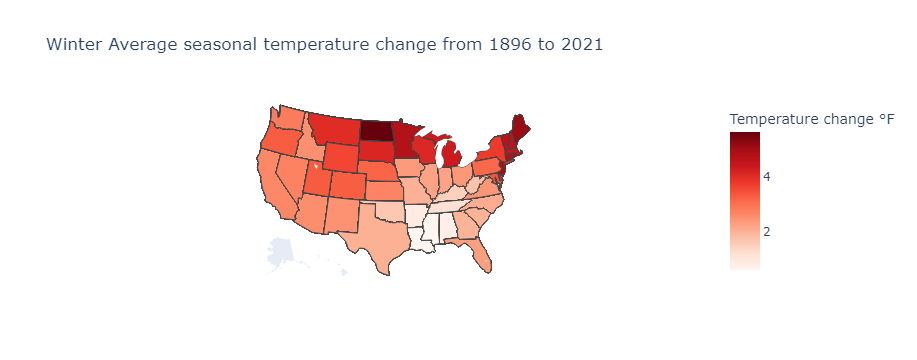

In [15]:
# Frequency refers to number of heatwaves 

fig = go.Figure(data=go.Choropleth( 
                 locations = df_changes_seas_temp["State"],
                 z = df_changes_seas_temp['Winter'].astype(float), 
                 locationmode = 'USA-states',
                 colorscale = 'Reds',
                 colorbar_title = "Temperature change °F",             
))

fig.update_layout(
    title_text = 'Winter Average seasonal temperature change from 1896 to 2021' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

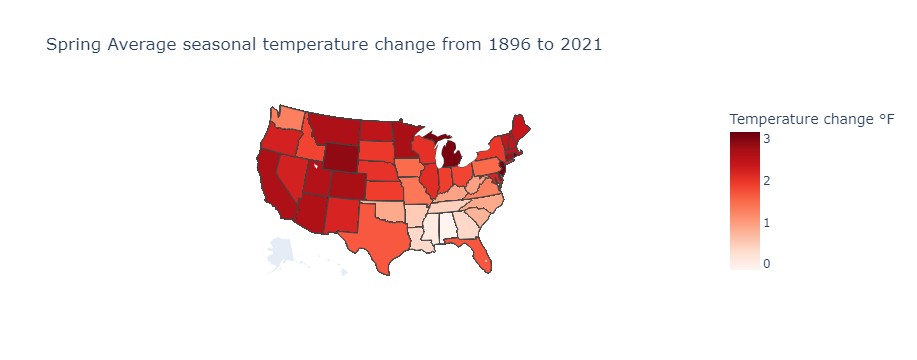

In [16]:
# Frequency refers to number of heatwaves 

fig = go.Figure(data=go.Choropleth( 
                 locations = df_changes_seas_temp["State"],
                 z = df_changes_seas_temp['Spring'].astype(float), 
                 locationmode = 'USA-states',
                 colorscale = 'Reds',
                 colorbar_title = "Temperature change °F",             
))

fig.update_layout(
    title_text = 'Spring Average seasonal temperature change from 1896 to 2021' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

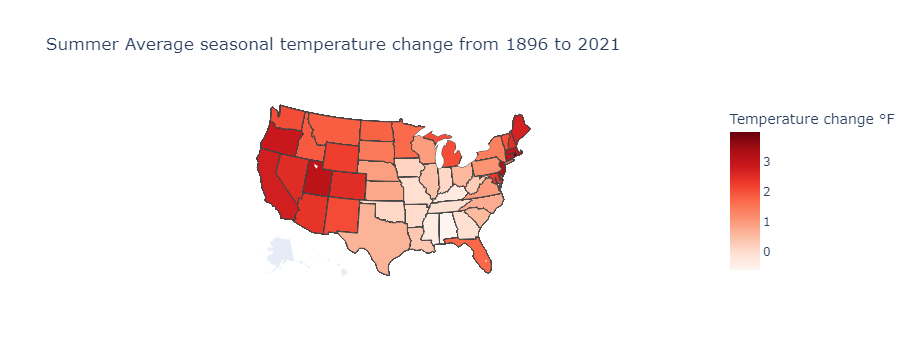

In [17]:
# Frequency refers to number of heatwaves 

fig = go.Figure(data=go.Choropleth( 
                 locations = df_changes_seas_temp["State"],
                 z = df_changes_seas_temp['Summer'].astype(float), 
                 locationmode = 'USA-states',
                 colorscale = 'Reds',
                 colorbar_title = "Temperature change °F",             
))

fig.update_layout(
    title_text = 'Summer Average seasonal temperature change from 1896 to 2021' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

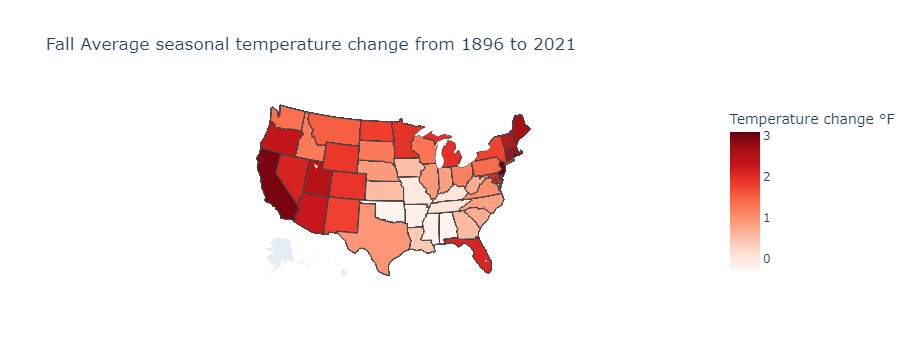

In [18]:
# Frequency refers to number of heatwaves 

fig = go.Figure(data=go.Choropleth( 
                 locations = df_changes_seas_temp["State"],
                 z = df_changes_seas_temp['Fall'].astype(float), 
                 locationmode = 'USA-states',
                 colorscale = 'Reds',
                 colorbar_title = "Temperature change °F",             
))

fig.update_layout(
    title_text = 'Fall Average seasonal temperature change from 1896 to 2021' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()